In [1]:
from sklearn import datasets, tree, model_selection, metrics, ensemble
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Product
763,10,101,76,48,180,32.9,0.171,63,0,1.266165
764,2,122,70,27,0,36.8,0.340,27,0,2.125681
765,5,121,72,23,112,26.2,0.245,30,0,2.008316
766,1,126,60,0,0,30.1,0.349,47,1,1.637330
767,1,93,70,31,0,30.4,0.315,23,0,2.010840


In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
Product                     float64
dtype: object

In [4]:
targets = data.Outcome ##  = data.iloc[0:, -2].copy()
targets

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
features = data.drop(['Outcome'], axis = 1).copy()
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Product
0,6,148,72,35,0,33.6,0.627,50,1.720465
1,1,85,66,29,0,26.6,0.351,31,1.655879
2,8,183,64,0,0,23.3,0.672,32,2.391391
3,1,89,66,23,94,28.1,0.167,21,2.058663
4,0,137,40,35,168,43.1,2.288,33,2.037527
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.266165
764,2,122,70,27,0,36.8,0.340,27,2.125681
765,5,121,72,23,112,26.2,0.245,30,2.008316
766,1,126,60,0,0,30.1,0.349,47,1.637330


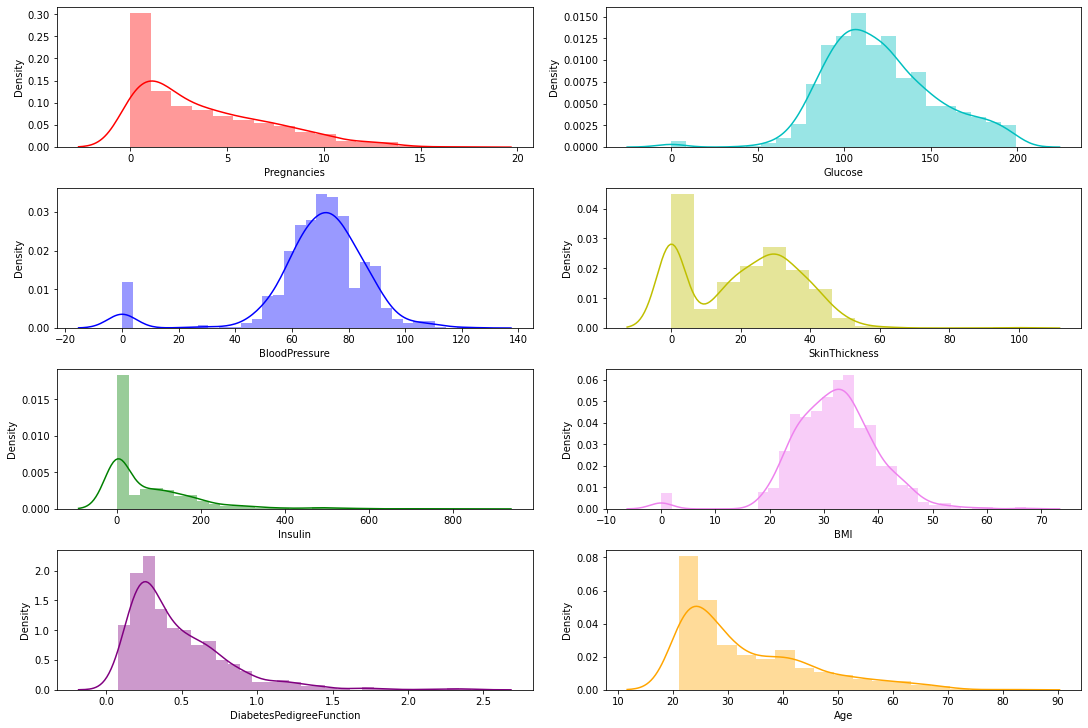

In [6]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 10), constrained_layout = True)
ax = ax.flatten()

colors = ['r', 'c', 'b', 'y', 'g', 'violet', 'purple', 'orange']
for i, c in enumerate(colors):
    sns.distplot(features.iloc[0:, i], color=c, ax=ax[i])
plt.show()

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, targets, test_size = 0.22, random_state = 1)
y_train

669    0
185    1
404    1
354    0
331    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 599, dtype: int64

In [8]:
def decision_tree_accuracy(criterion, max_depth):
    dec_tree = tree.DecisionTreeClassifier(
        max_depth = max_depth, random_state = 1, criterion = criterion)
    dec_tree = dec_tree.fit(X_train, y_train)
    prediction_train = dec_tree.predict(X_train)
    prediction_test = dec_tree.predict(X_test)
    print('The Accuracy based on {} on Train set is {:.4f} {}'
          .format(criterion.capitalize(), metrics.accuracy_score(y_train, prediction_train)*100, '%'))
    print('The Accuracy based on {} on Test set is {:.4f} {}'
          .format(criterion.capitalize(), metrics.accuracy_score(y_test, prediction_test)*100, '%'))
    return dec_tree

In [9]:
fn = data.columns.values
cn = ['non-diabetic','diabetic']
def decision_tree_plot(criterion, dec_tree):
    plt.figure(figsize = (100, 75))
    tree.plot_tree(dec_tree, feature_names = fn,
                   class_names = cn, filled = True, node_ids = True)
    plt.savefig('{}.jpg'.format(criterion.capitalize()))
    plt.title(criterion.capitalize())
    plt.show()

In [10]:
dec_tree_entropy = decision_tree_accuracy('entropy', 3)

The Accuracy based on Entropy on Train set is 76.6277 %
The Accuracy based on Entropy on Test set is 77.5148 %


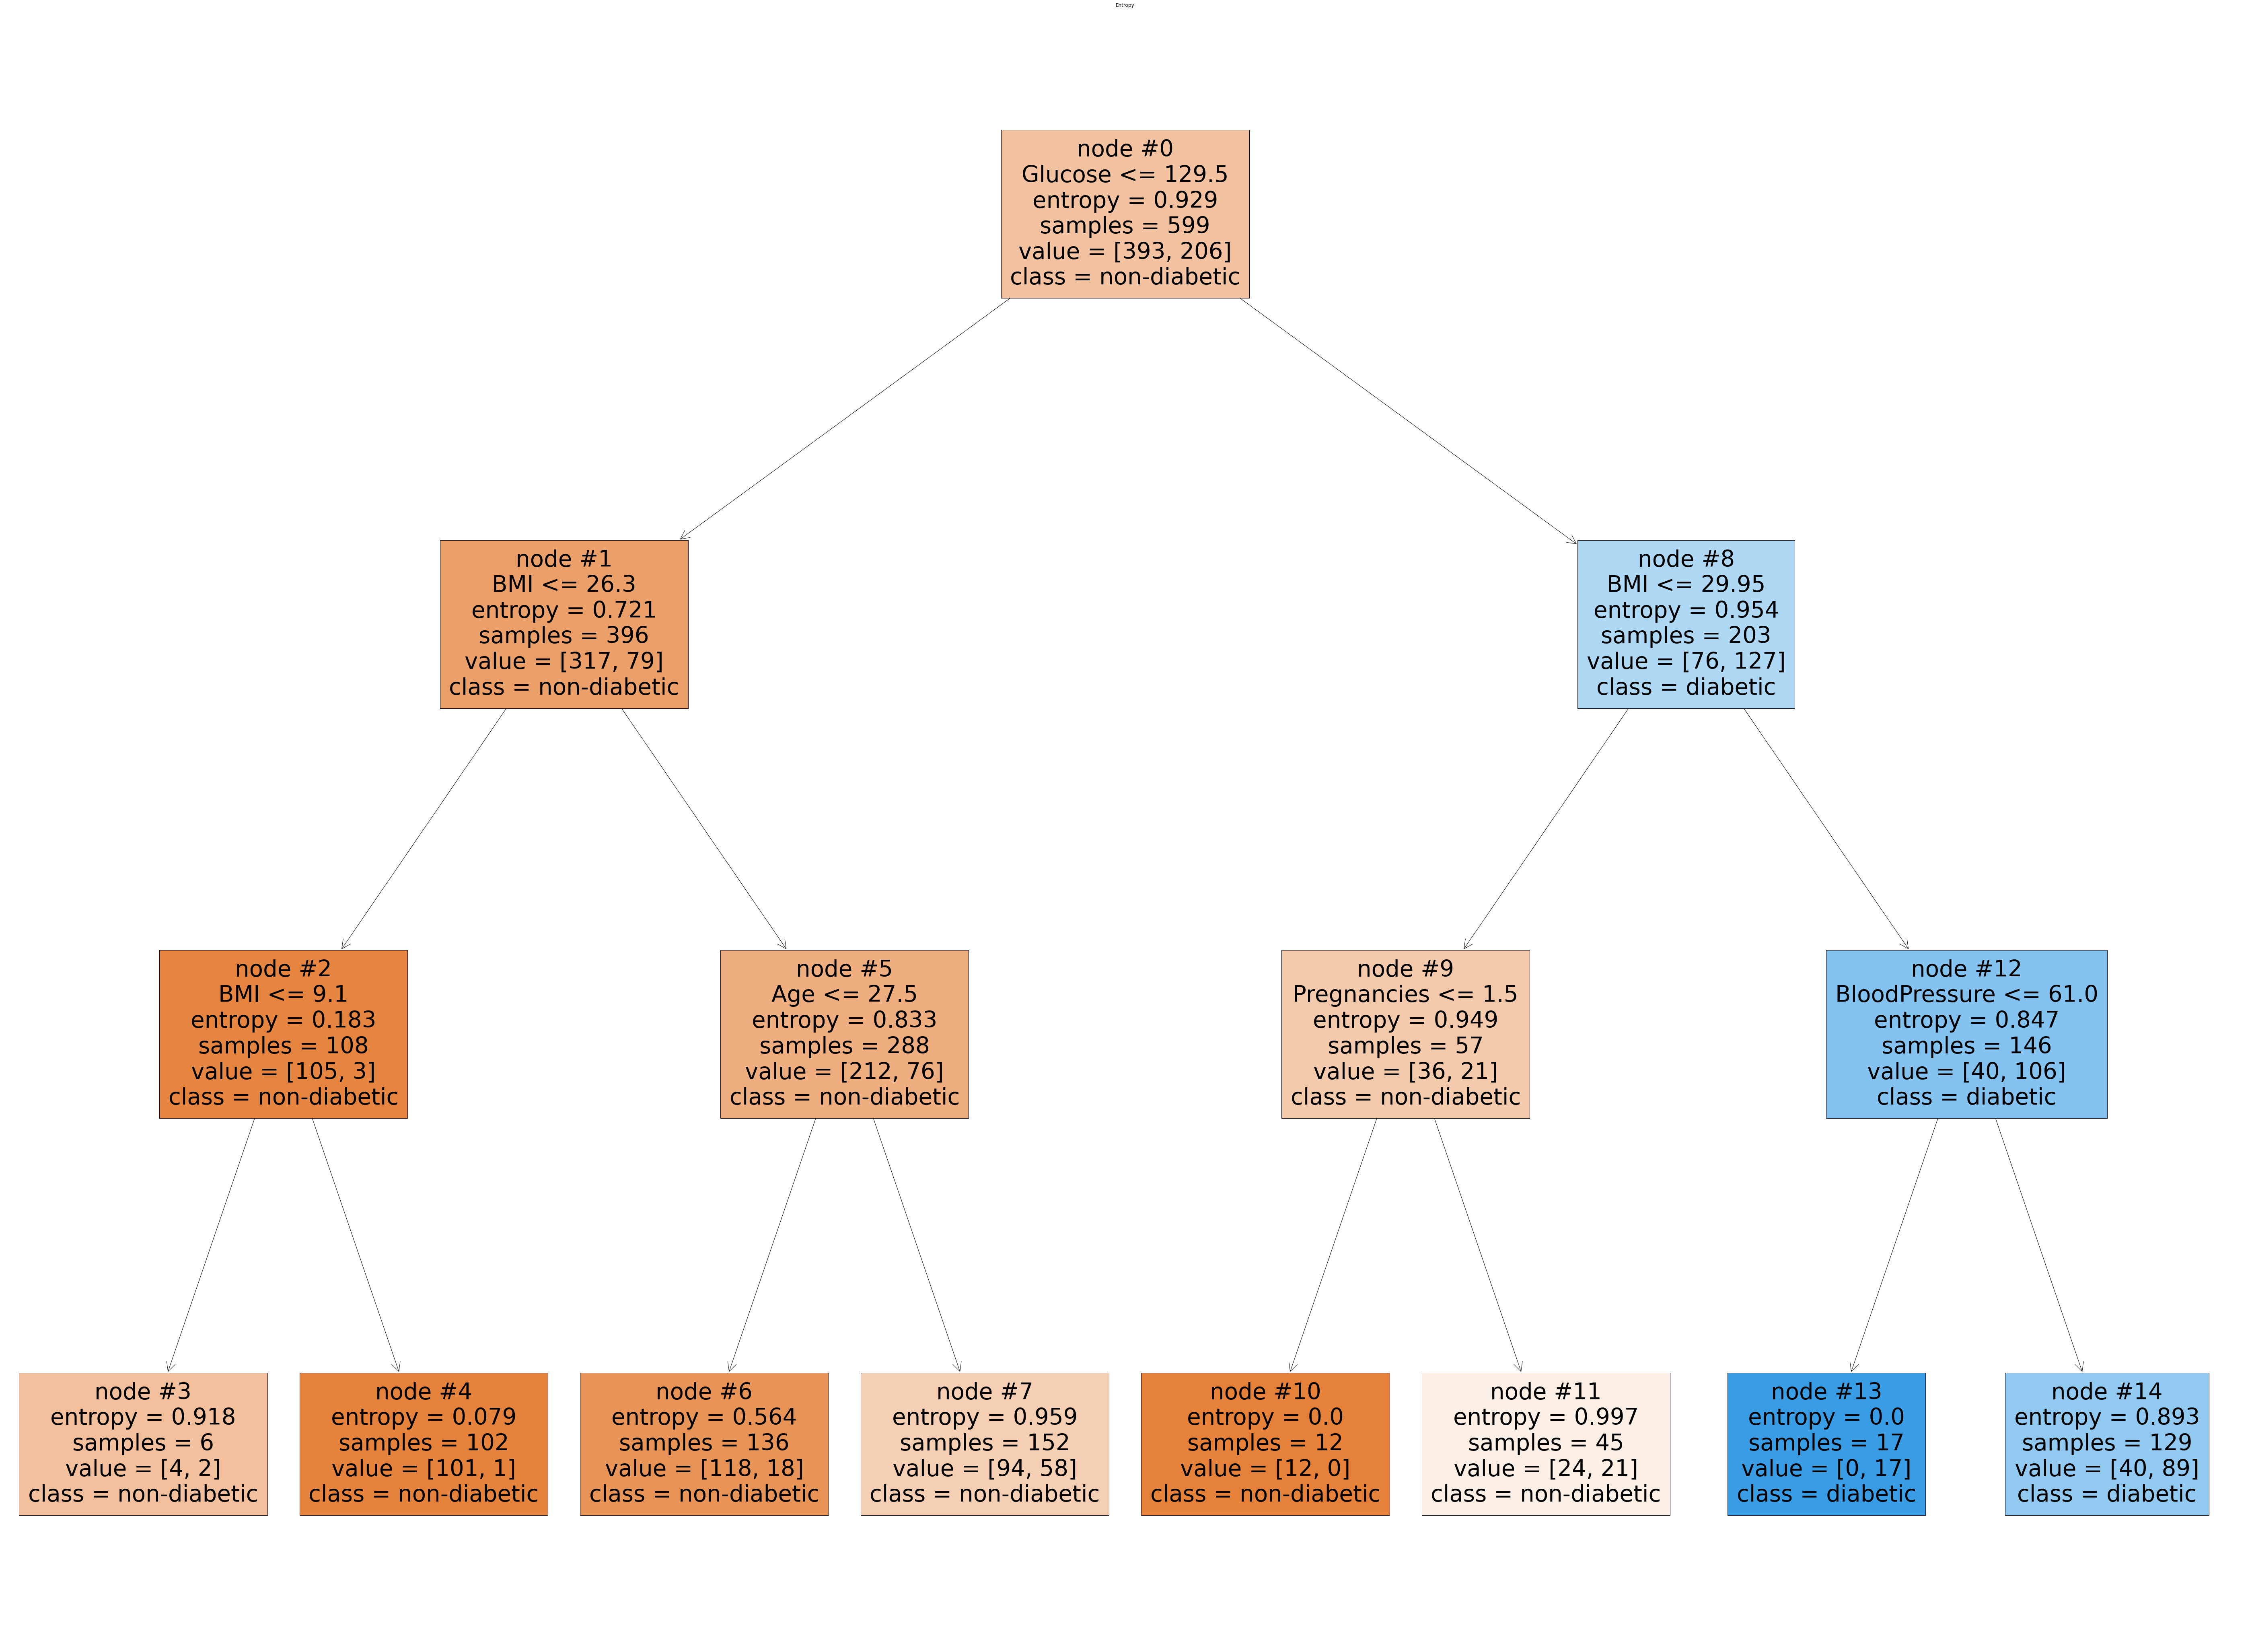

In [11]:
decision_tree_plot('entropy', dec_tree_entropy)

In [12]:
dec_tree_gini = decision_tree_accuracy('gini', 5)

The Accuracy based on Gini on Train set is 83.6394 %
The Accuracy based on Gini on Test set is 78.1065 %


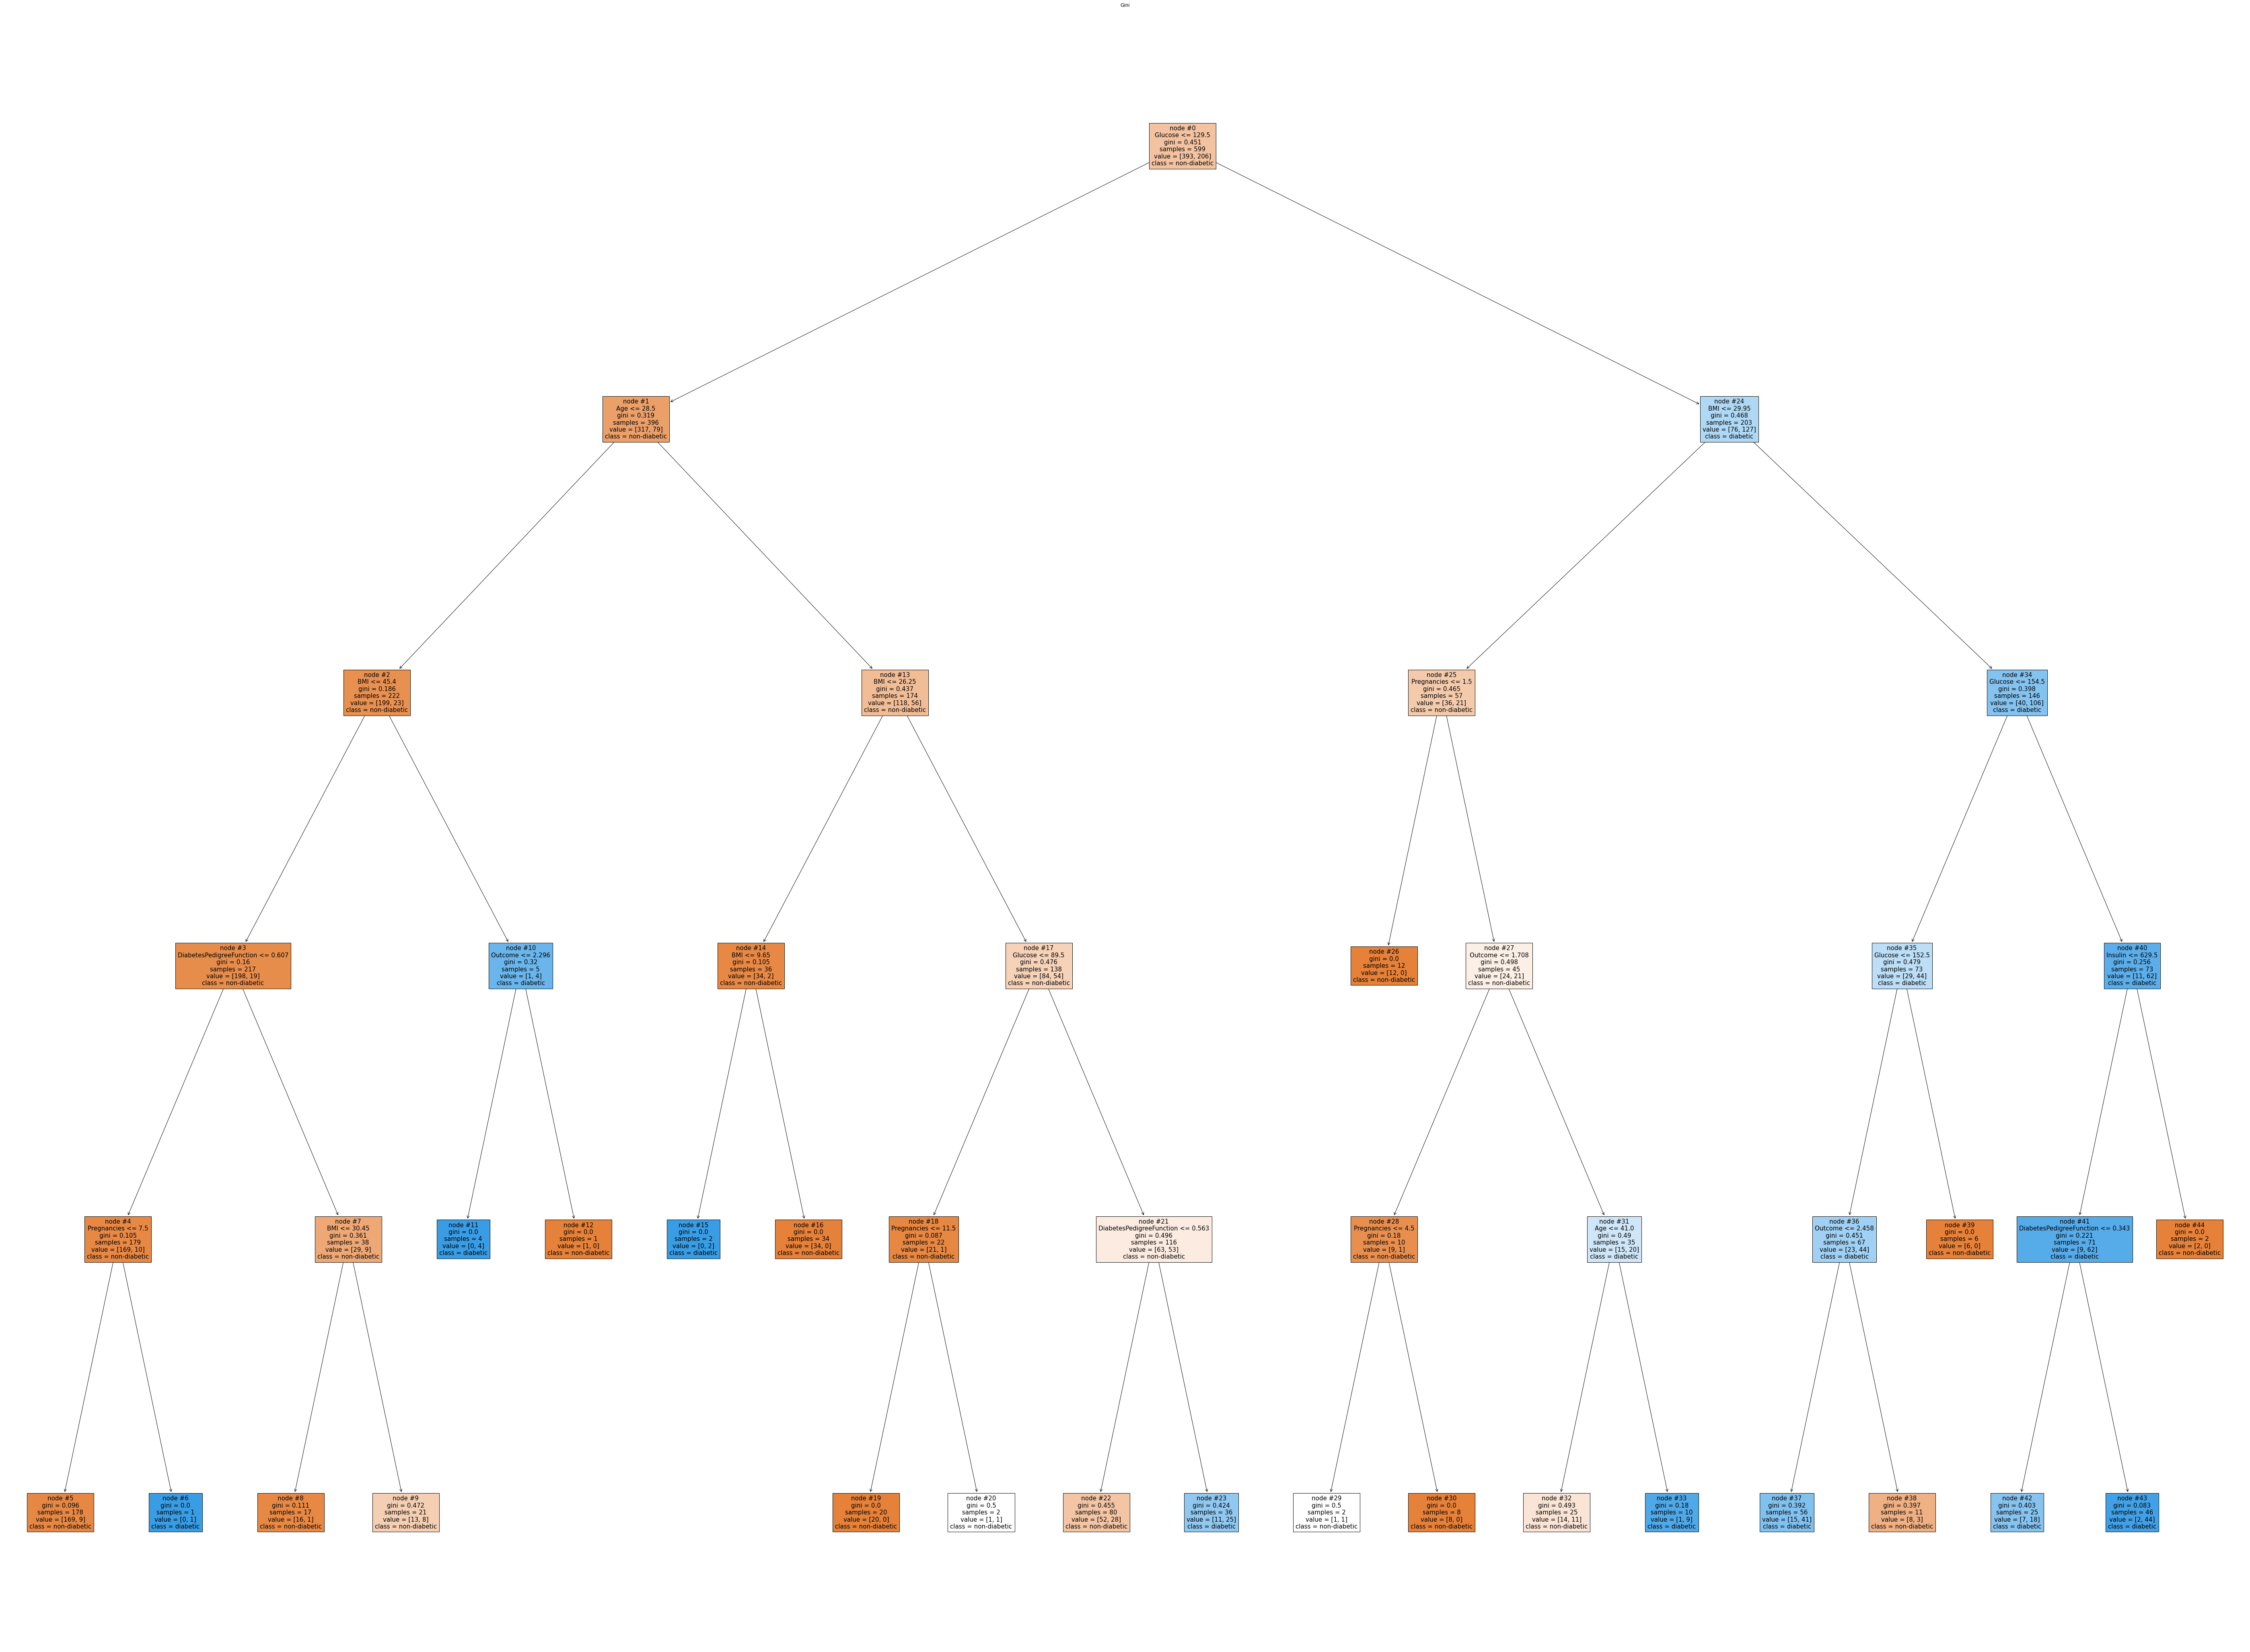

In [13]:
decision_tree_plot('gini', dec_tree_gini)

In [14]:
def confusion_matrix(model, title):
    metrics.plot_confusion_matrix(model, X_test, y_test, display_labels = cn)
    plt.title(title)
    plt.show()

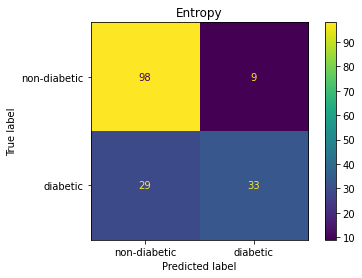

In [15]:
confusion_matrix(dec_tree_entropy, 'Entropy')

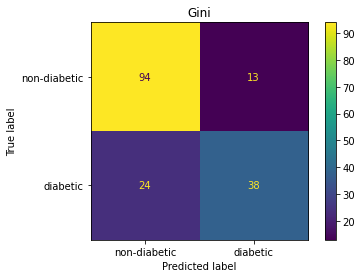

In [16]:
confusion_matrix(dec_tree_gini, 'Gini')

In [17]:
n_estimators = 44
random_forest = ensemble.RandomForestClassifier(n_estimators=n_estimators, criterion='gini', min_samples_leaf=2,
                                                min_samples_split=3, max_features='sqrt',
                                                random_state=21, n_jobs=2, max_depth=5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=44, n_jobs=2,
                       random_state=21)

In [18]:
def print_rf_acc(n_estimators):
    prediction_train = random_forest.predict(X_train)
    prediction_test = random_forest.predict(X_test)
    print('The Accuracy based on {} on Train set is {:.4f} {} where n_estimators = {}'
          .format('Random Forest', metrics.accuracy_score(y_train, prediction_train)*100, '%', n_estimators))
    print('The Accuracy based on {} on Test set is {:.4f} {} where n_estimators = {}'
          .format('Random Forest', metrics.accuracy_score(y_test, prediction_test)*100, '%', n_estimators))

In [19]:
print_rf_acc(n_estimators)

The Accuracy based on Random Forest on Train set is 84.8080 % where n_estimators = 44
The Accuracy based on Random Forest on Test set is 81.6568 % where n_estimators = 44


In [20]:
for n in range(1, 100):
    random_forest = ensemble.RandomForestClassifier(n_estimators=n, criterion='gini', min_samples_leaf=2,
                                                    min_samples_split=3, max_features='sqrt',
                                                    random_state=21, n_jobs=2, max_depth=5)
    random_forest.fit(X_train, y_train)
    prediction_test = random_forest.predict(X_test)
    if metrics.accuracy_score(y_test, prediction_test)*100 > 82:
        print('The Accuracy based on {} on Test set is {:.4f} {}  where n_estimators = {}'
              .format('Random Forest', metrics.accuracy_score(y_test, prediction_test)*100, '%', n))

The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 33
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 34
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 38
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 39
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 40
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 41
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 42
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 51
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 52
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 53
The Accuracy based on Random Forest on Test set is 82.2485 %  where n_estimators = 54
The Accuracy based on Random Forest on Test set is 82.

In [21]:
n_estimators = 33
random_forest = ensemble.RandomForestClassifier(n_estimators=n_estimators, criterion='gini', min_samples_leaf=2,
                                                min_samples_split=3, max_features='sqrt',
                                                random_state=21, n_jobs=2, max_depth=5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=33, n_jobs=2,
                       random_state=21)

In [22]:
print_rf_acc(n_estimators)

The Accuracy based on Random Forest on Train set is 84.4741 % where n_estimators = 33
The Accuracy based on Random Forest on Test set is 82.2485 % where n_estimators = 33


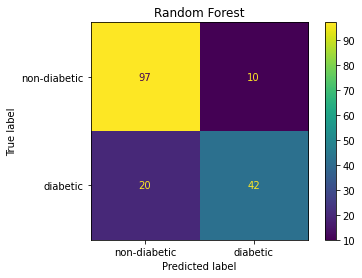

In [23]:
confusion_matrix(random_forest, 'Random Forest')

In [24]:
def cross_validation(model, title):
    score_res = None
    result = 0
    size = 2
    for i in range(2, 20):
        score = model_selection.cross_val_score(model, X_train, y_train, cv=i)
        if result < score.mean():
            score_res = score
            result = score.mean()
            size = i
    df = pd.DataFrame(data={'tree': range(size), 'accuracy': score_res})
    df.plot(x='tree', y='accuracy', marker='^', linestyle=':')
    plt.title('{} accuracy'.format(title))
    plt.show()
    print(result)

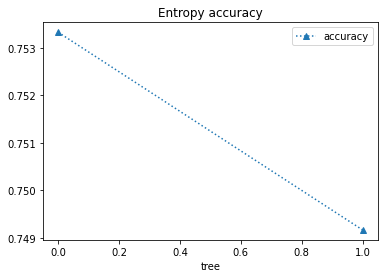

0.7512486064659978


In [25]:
cross_validation(dec_tree_entropy, 'Entropy')

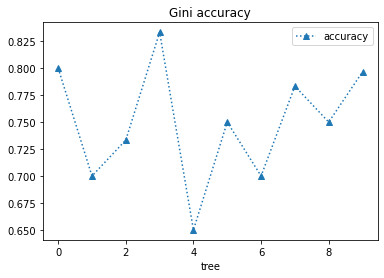

0.7496610169491524


In [26]:
cross_validation(dec_tree_gini, 'Gini')

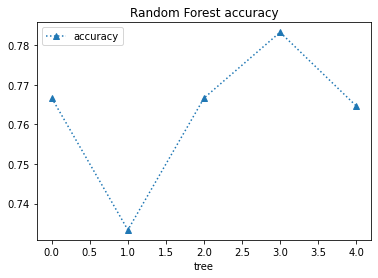

0.7629411764705882


In [27]:
cross_validation(random_forest, 'Random Forest')